# California Housing Price Prediction

## Import Libraries:

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Housing Data:

In [79]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Above we can see that the 'total_bedrooms' column has a few missing values

## Missing Values Imputation

In [81]:
percentage = round(df.isnull().sum()/ len(df) *100, 3)
percentage

longitude             0.000
latitude              0.000
housing_median_age    0.000
total_rooms           0.000
total_bedrooms        1.003
population            0.000
households            0.000
median_income         0.000
median_house_value    0.000
ocean_proximity       0.000
dtype: float64

#### When having around 1% of the values missing in this column, the easiest imputation method would be to impute the missing values with the mean.

In [82]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Outlier Distribution Detection For Numerical Columns

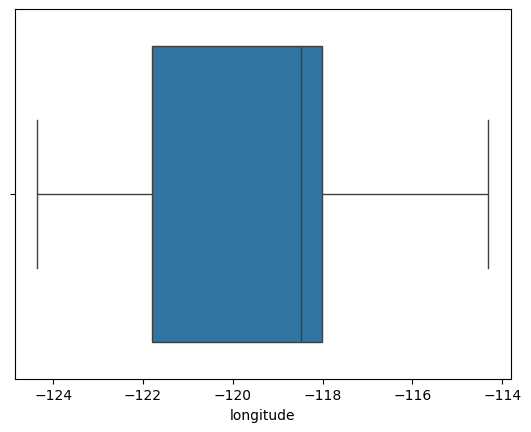

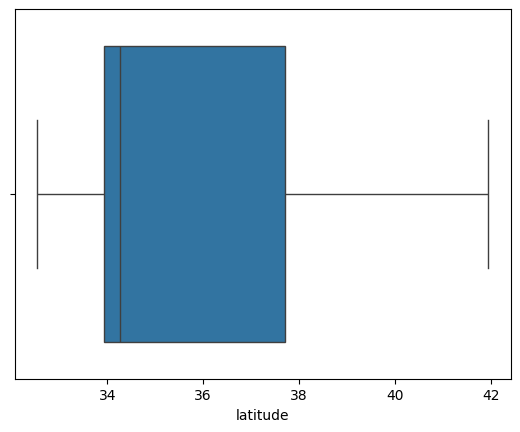

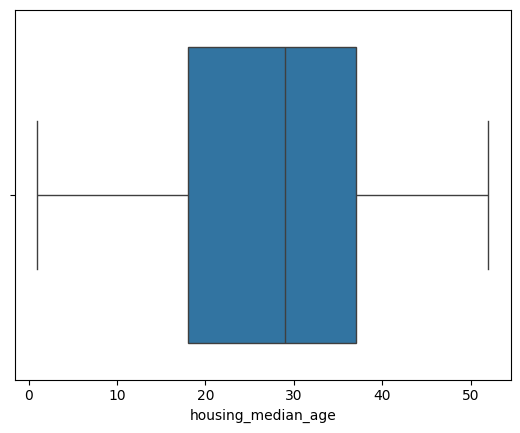

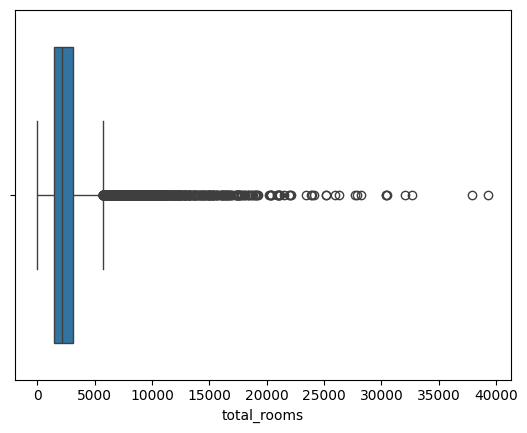

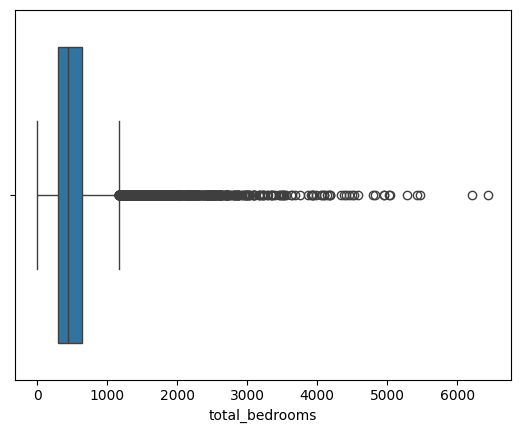

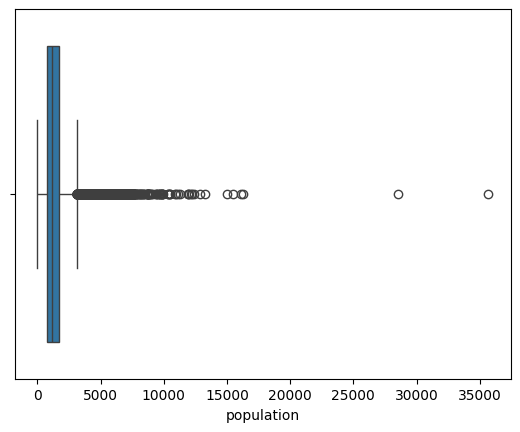

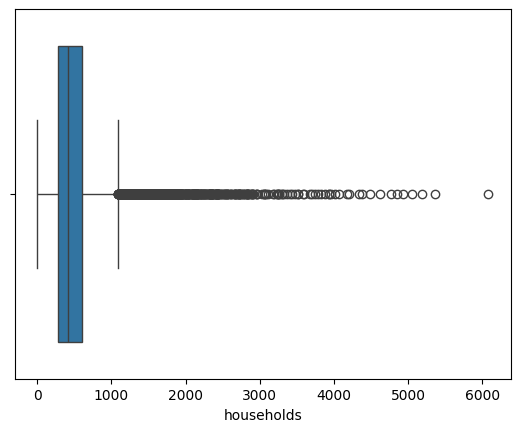

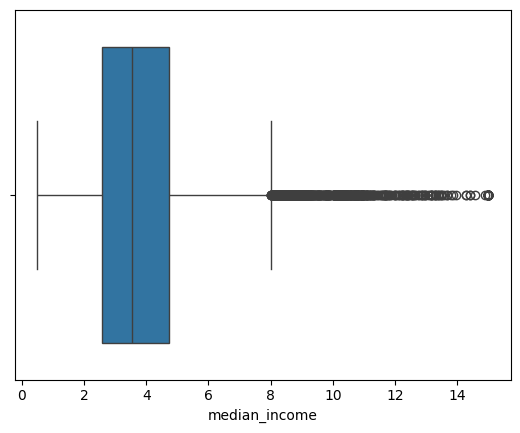

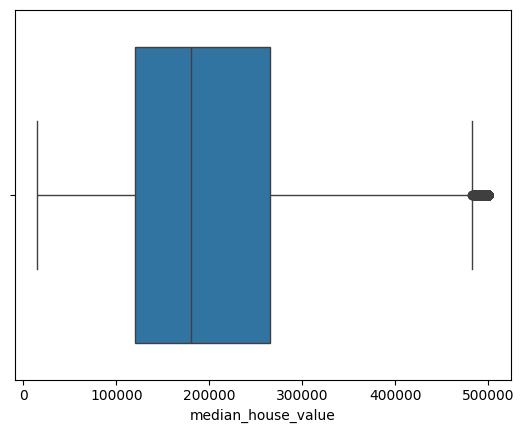

In [84]:
for i in df.select_dtypes(include= 'number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

#### From our visualizations above, we can see that total_rooms, total_bedrooms, population, median_income and households has some outliers for us to handle.

In [85]:
def whisker(col):
    q1, q3 = np.percentile(col,[25,75])
    iqr = q3 -q1
    lw = q1 - 1.5 * iqr #lower whisker
    uw = q3 + 1.5 * iqr #upper whisker
    return lw, uw 

for i in ['total_rooms', 'total_bedrooms', 'population', 'median_income', 'households']:
    lw, uw = whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

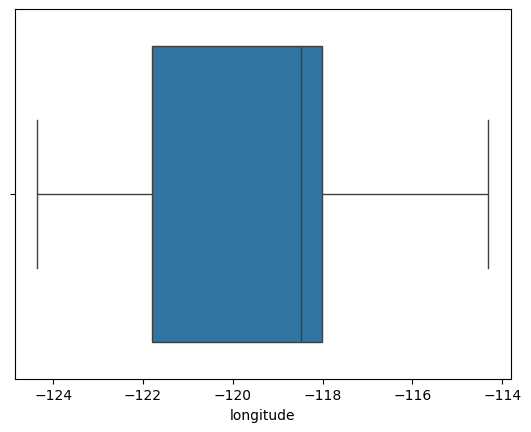

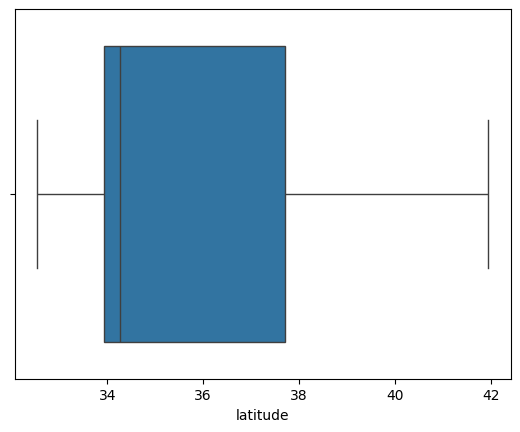

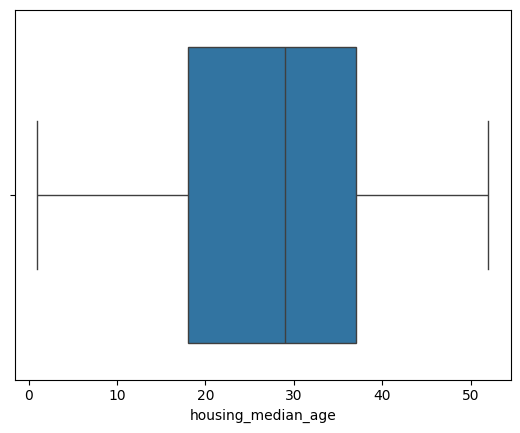

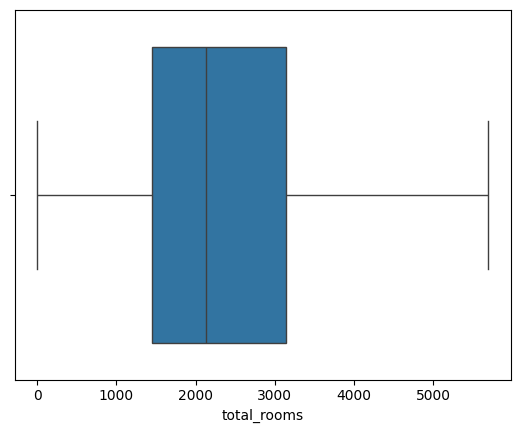

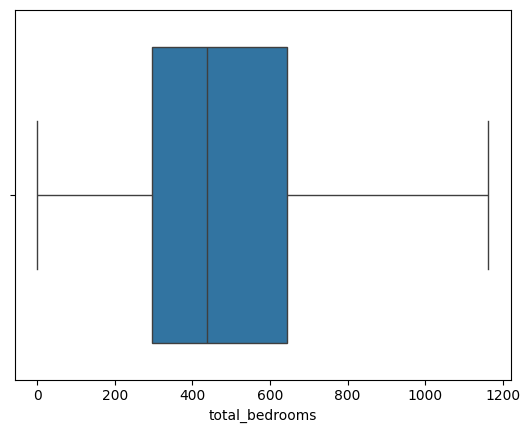

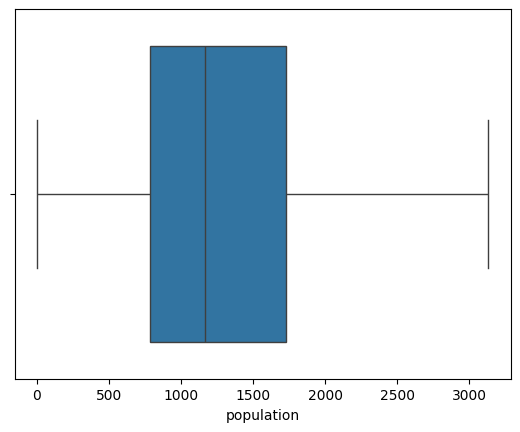

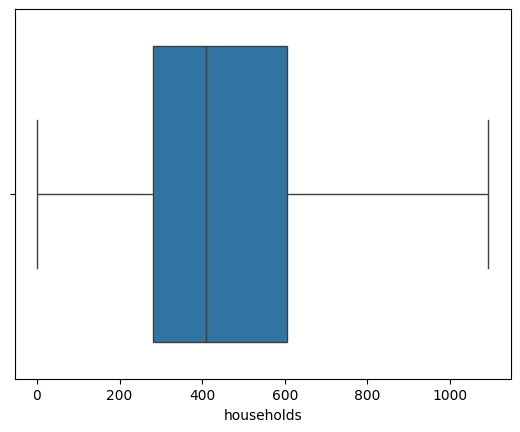

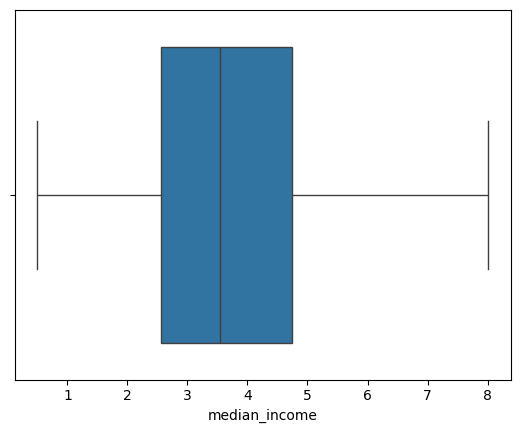

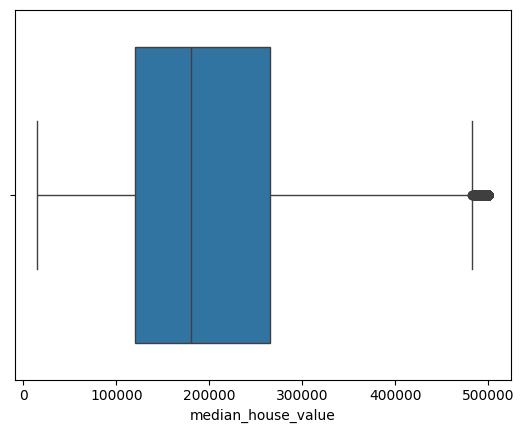

In [86]:
for i in df.select_dtypes(include= 'number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

#### We don't handle outliers in the median_house_value column as this will be our target variable later on.

## Feature Selection:

### Visual Distribution of Ocean Proximity using a Scatterplot

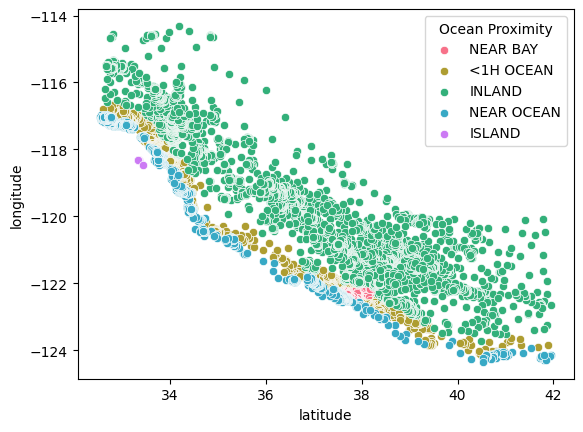

In [87]:
palette = sns.color_palette("husl", len(df['ocean_proximity'].unique()))

for i, category in enumerate(df['ocean_proximity'].unique()):
    subset = df[df['ocean_proximity'] == category]
    sns.scatterplot(data=subset, x='latitude', y='longitude', color=palette[i], label=category)

plt.legend(title='Ocean Proximity')
plt.show()

#### From this scatterplot, we can see that our ocean_proximity column has a class imbalance due to the fact that the "Inland" category has more instances than the others. We will need to find a way to handle this imbalance before training our model.

In [88]:
value_count = df['ocean_proximity'].value_counts()
print(value_count)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


### We will use the RandomOverSampler to oversample our minority classes in the ocean_proximity column to balance the data.

In [89]:
from imblearn.over_sampling import RandomOverSampler
balanced_df = df.copy()

ros = RandomOverSampler(sampling_strategy='auto')

X = balanced_df.drop('ocean_proximity', axis=1)
y = balanced_df['ocean_proximity']

X_resampled, y_resampled = ros.fit_resample(X, y)

# Concatenate the resampled features and target variable into a new dataframe
data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['ocean_proximity'])], axis=1)


### When oversampling a class imbalance the way we did, we will need to shuffle our data so that any duplicates created will be spread out across our dataset.

In [90]:
data = data.sample(frac=1).reset_index(drop=True)

In [91]:
value_count = data['ocean_proximity'].value_counts()
print(value_count)

ocean_proximity
ISLAND        9136
NEAR OCEAN    9136
INLAND        9136
<1H OCEAN     9136
NEAR BAY      9136
Name: count, dtype: int64


## Machine learning models cannot interpret strings or words, so we will have to encode the 'ocean_proximity' column to be able to use this feature in our model. I have chosen to use the pandas get_dummies module as I did not want to set each category in the column as a different number due the fact that our model will see this as aggregation or increments in the column.

In [92]:
data= pd.get_dummies(data=data, columns=['ocean_proximity'])

In [93]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-118.32,33.33,52.0,2127.000,512.000,733.0,288.0,3.3906,300000.0,False,False,True,False,False
1,-118.32,33.34,52.0,996.000,264.000,341.0,160.0,2.7361,450000.0,False,False,True,False,False
2,-117.11,32.78,16.0,2470.000,830.000,1170.0,724.0,3.5562,73500.0,False,False,False,False,True
3,-116.91,34.00,18.0,553.000,100.000,215.0,82.0,5.5000,193800.0,False,True,False,False,False
4,-117.85,33.79,46.0,1846.000,383.000,867.0,336.0,3.4234,200000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45675,-117.27,33.02,13.0,5698.375,1162.625,2450.0,1092.5,4.7179,376700.0,False,False,False,False,True
45676,-124.15,40.81,50.0,340.000,74.000,235.0,83.0,1.7500,67500.0,False,False,False,False,True
45677,-118.29,33.74,41.0,1382.000,361.000,905.0,344.0,2.7500,238300.0,False,False,False,False,True
45678,-122.29,38.00,16.0,4986.000,1081.000,2805.0,1016.0,4.0250,173200.0,False,False,False,True,False


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45680 entries, 0 to 45679
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   45680 non-null  float64
 1   latitude                    45680 non-null  float64
 2   housing_median_age          45680 non-null  float64
 3   total_rooms                 45680 non-null  float64
 4   total_bedrooms              45680 non-null  float64
 5   population                  45680 non-null  float64
 6   households                  45680 non-null  float64
 7   median_income               45680 non-null  float64
 8   median_house_value          45680 non-null  float64
 9   ocean_proximity_<1H OCEAN   45680 non-null  bool   
 10  ocean_proximity_INLAND      45680 non-null  bool   
 11  ocean_proximity_ISLAND      45680 non-null  bool   
 12  ocean_proximity_NEAR BAY    45680 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  456

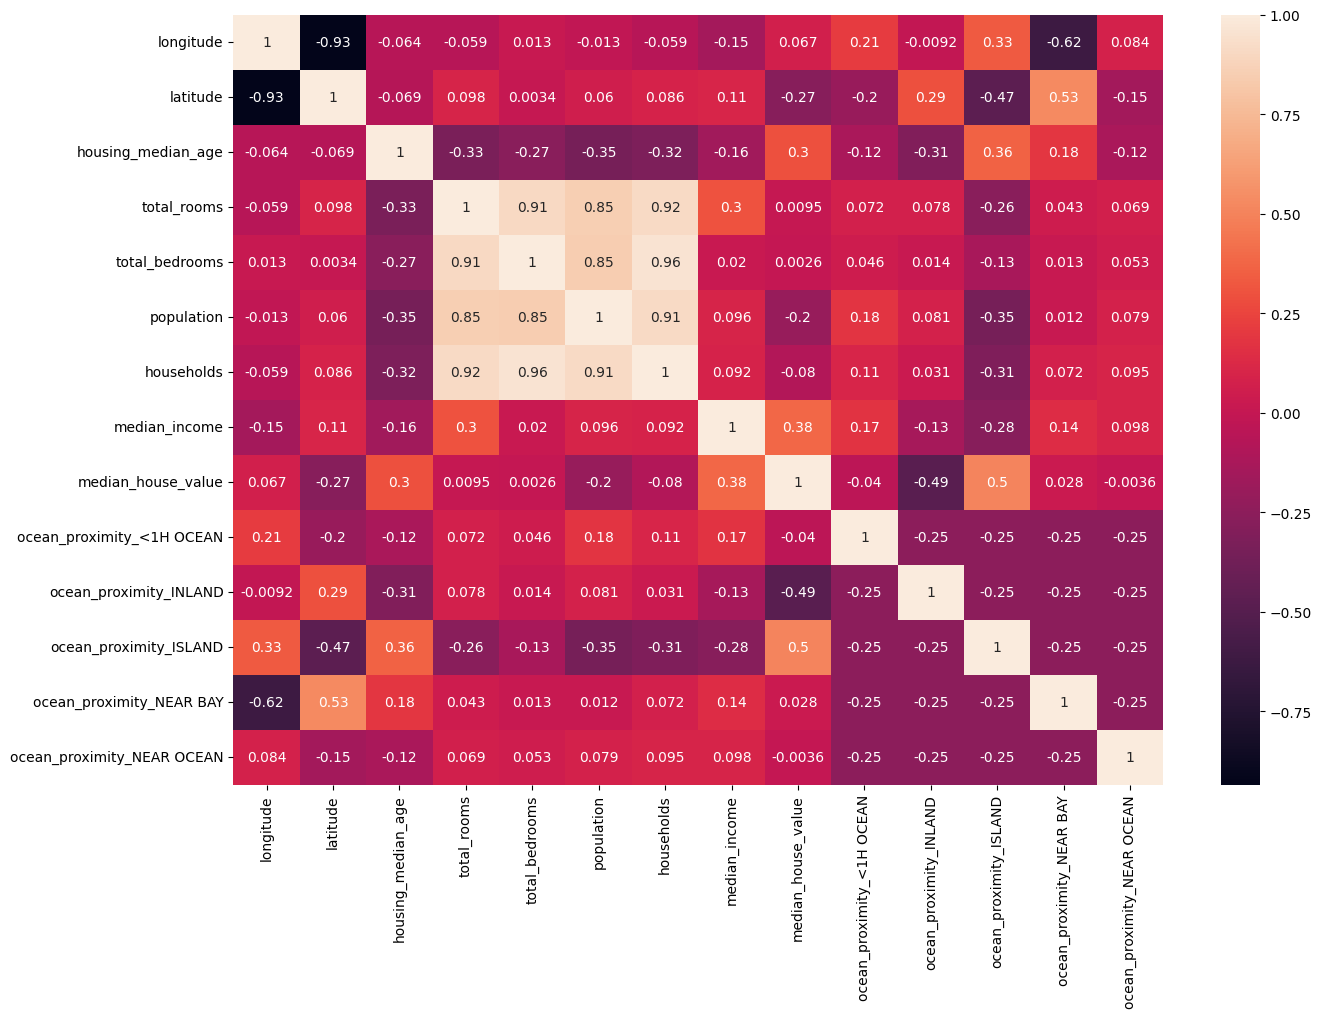

In [95]:
heatmap = data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(heatmap, annot=True)
plt.show()

#### From the heatmap we can see that the "total_rooms" and the "total_bedrooms" have a near perfect multicolinearity which we don't want when training our model. We can also see that the total_bedrooms has a very strong positive correlation with the "population" and "household" variables. So it only makes sense that we drop this column from our dataframe to prevent any bias in our model.

#### Upon further analysis I also see that the "population" column has a very strong positive correlation with the "households" column. We can also drop this column to prevent further bias in our model.

In [96]:
data = data.drop(['total_bedrooms', 'population'], axis= 1)

## Building our Machine Learning Model:

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [98]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

## When choosing the features for the model, I decided to leave out the 'ocean_proximity_island' feature as we over sampled this class quite a bit so it would not suit our model.

In [99]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']
target = 'median_house_value'
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### We will need to scale our X values before implementing our model because they are all on different scales to one another.

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

## Linear Regression Model:

In [103]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)
rmse = round(sqrt(mse), 2)
print(f'${rmse}')
print(r2*100)

$77180.05
85.64281217040661


### Our linear regression model performs really average. An RMSE value of 77180.05 shows that we can predict the california house prices within $77k of the actual median house value. For good measure, lets try a few other models and see how those models are able to perform.

## Decision Tree Regressor Model:

In [104]:
dc = DecisionTreeRegressor()
dc.fit(X_train_scaled, y_train)
y_pred = dc.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = round(sqrt(mse), 2)
r2 = r2_score(y_test, y_pred)
print(f'${rmse}')
print(r2*100)

$73621.87
67.80851073849976


### The Decision Tree Regressor Model performs better than our Linear Regression model. The model is able to predict the median house value to within 73k dollars which is around a $3k difference to our Linear Regression Model but the model has a worse R2-Score.

## XGBoost Regressor Model:

In [105]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [106]:
from xgboost import XGBRegressor

In [107]:
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = round(sqrt(mse), 2)
r2 = r2_score(y_test, y_pred)
print(f'${rmse}')
print(r2*100)

$56640.05
80.94650146994455


### The XgBoost model performed moderately compared to the other 2 models. The model was able to predict the prices to within 56k dollars which is around a 21k dollar difference to our Linear Regression Model but also has a decent R2-Score of 80.95.